In [17]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [18]:
dat = np.loadtxt('default6.csv', delimiter=',', dtype=np.float64)

start = 1
stop = 0.2
xs = dat[start:,0]
ys = dat[start:,1]

[ 1.32811195e-07  6.37702927e+00 -7.38164272e-01  8.47640357e-07]
[ 6.04280776e-08 -6.71827532e-01 -5.11232139e-01  8.46171952e-07]
14.20900437


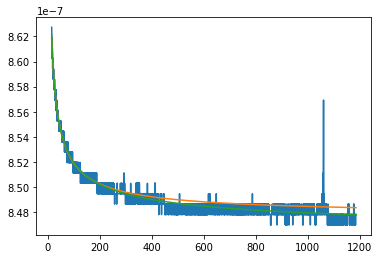

In [19]:
#def F(x, a, w, c): return a*np.log(x+w)+c
def F(x, a, w, b, c): return a*np.power(x+w,b)+c

end = int(len(xs)*stop)
[cvec1, _] = curve_fit(F, xs[:end], ys[:end], p0=[1, 100, -1, 0], maxfev=10000)
[cvec2, _] = curve_fit(F, xs, ys, p0=[1, 100, -1, 0], maxfev=10000)

print(cvec1)
print(cvec2)
print(xs[0])
plt.plot(xs, ys)
plt.plot(xs, F(xs,*cvec1))
plt.plot(xs, F(xs,*cvec2))

[-2.70038932e-09 -1.29195618e+01  8.64223321e-07]
[-1.86369424e-09 -1.41393974e+01  8.60456446e-07]
14.20900437
<ipython-input-20-6bfbbe18e16d>:2: RuntimeWarning: invalid value encountered in log
  def F(x, a, w, c): return a*np.log(x+w)+c


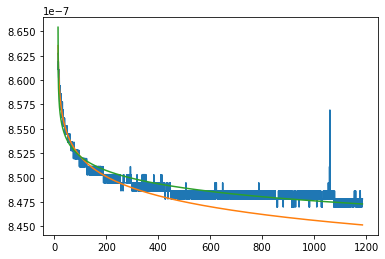

In [20]:
#def F(x, a, w, c): return a*np.log(x+w)+c
def F(x, a, w, c): return a*np.log(x+w)+c

end = int(len(xs)*stop)
[cvec1, _] = curve_fit(F, xs[:end], ys[:end], p0=[1, 10, 0])
[cvec2, _] = curve_fit(F, xs, ys, p0=[1, 10, 0])

print(cvec1)
print(cvec2)
print(xs[0])
plt.plot(xs, ys)
plt.plot(xs, F(xs,*cvec1))
plt.plot(xs, F(xs,*cvec2))